In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [48]:
df = pd.read_csv('penguins_eda.csv')
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1
3,Adelie,36.7,19.3,193.0,3450.0,0,0,1
4,Adelie,39.3,20.6,190.0,3650.0,1,0,1


In [49]:
X = df.drop(labels='species', axis=1)
y = df['species']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print(f'X_train size: {len(X_train)}', end=', ')
print(f'X_test size: {len(X_test)}')
print(f'y_train size: {len(y_train)}', end=', ')
print(f'y_test size: {len(y_test)}')

X_train size: 290, X_test size: 52
y_train size: 290, y_test size: 52


In [97]:
param_grid = {
    'criterion': ["gini", "entropy"],
    'splitter': ["best", "random"],
    'max_depth': np.arange(2, 12, 2),
    'max_features': [None, "auto", "sqrt", "log2"]    
}

In [98]:
estimator_dict = {}
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)   
d = {'Best_score': grid_search.best_score_ ,
     'Best_params': grid_search.best_params_, 
     'Best_estimator': grid_search.best_estimator_} 
estimator_dict.update(d)
print(estimator_dict)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s


{'Best_score': 0.9827586206896551, 'Best_params': {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'splitter': 'random'}, 'Best_estimator': DecisionTreeClassifier(max_depth=10, splitter='random')}


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.5s finished


In [99]:
def model_report(model):
    print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred)}')
    print(classification_report(y_true=y_test, y_pred=y_pred))
    
    print(pd.DataFrame(
            index=X.columns,
            data=tree_model.feature_importances_,
            columns=['Features']).sort_values(by='Features', ascending=False))
    
    plot_confusion_matrix(
        estimator=tree_model,
        X=X_test,
        y_true=y_test
    );
    
    plt.figure(figsize=(20, 10), dpi=200)
    plot_tree(
        decision_tree=tree_model,
        feature_names=X.columns,
        filled=True,
        node_ids=True
    );

In [100]:
best_model = estimator_dict['Best_estimator'].fit(X_train, y_train)
y_pred = best_model.predict(X_test)

Accuracy: 0.9807692307692307
              precision    recall  f1-score   support

      Adelie       1.00      0.96      0.98        27
   Chinstrap       1.00      1.00      1.00        10
      Gentoo       0.94      1.00      0.97        15

    accuracy                           0.98        52
   macro avg       0.98      0.99      0.98        52
weighted avg       0.98      0.98      0.98        52

                   Features
flipper_length_mm  0.528472
culmen_length_mm   0.388616
culmen_depth_mm    0.066441
island_Dream       0.016471
body_mass_g        0.000000
sex                0.000000
island_Torgersen   0.000000


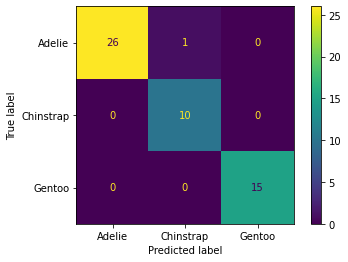

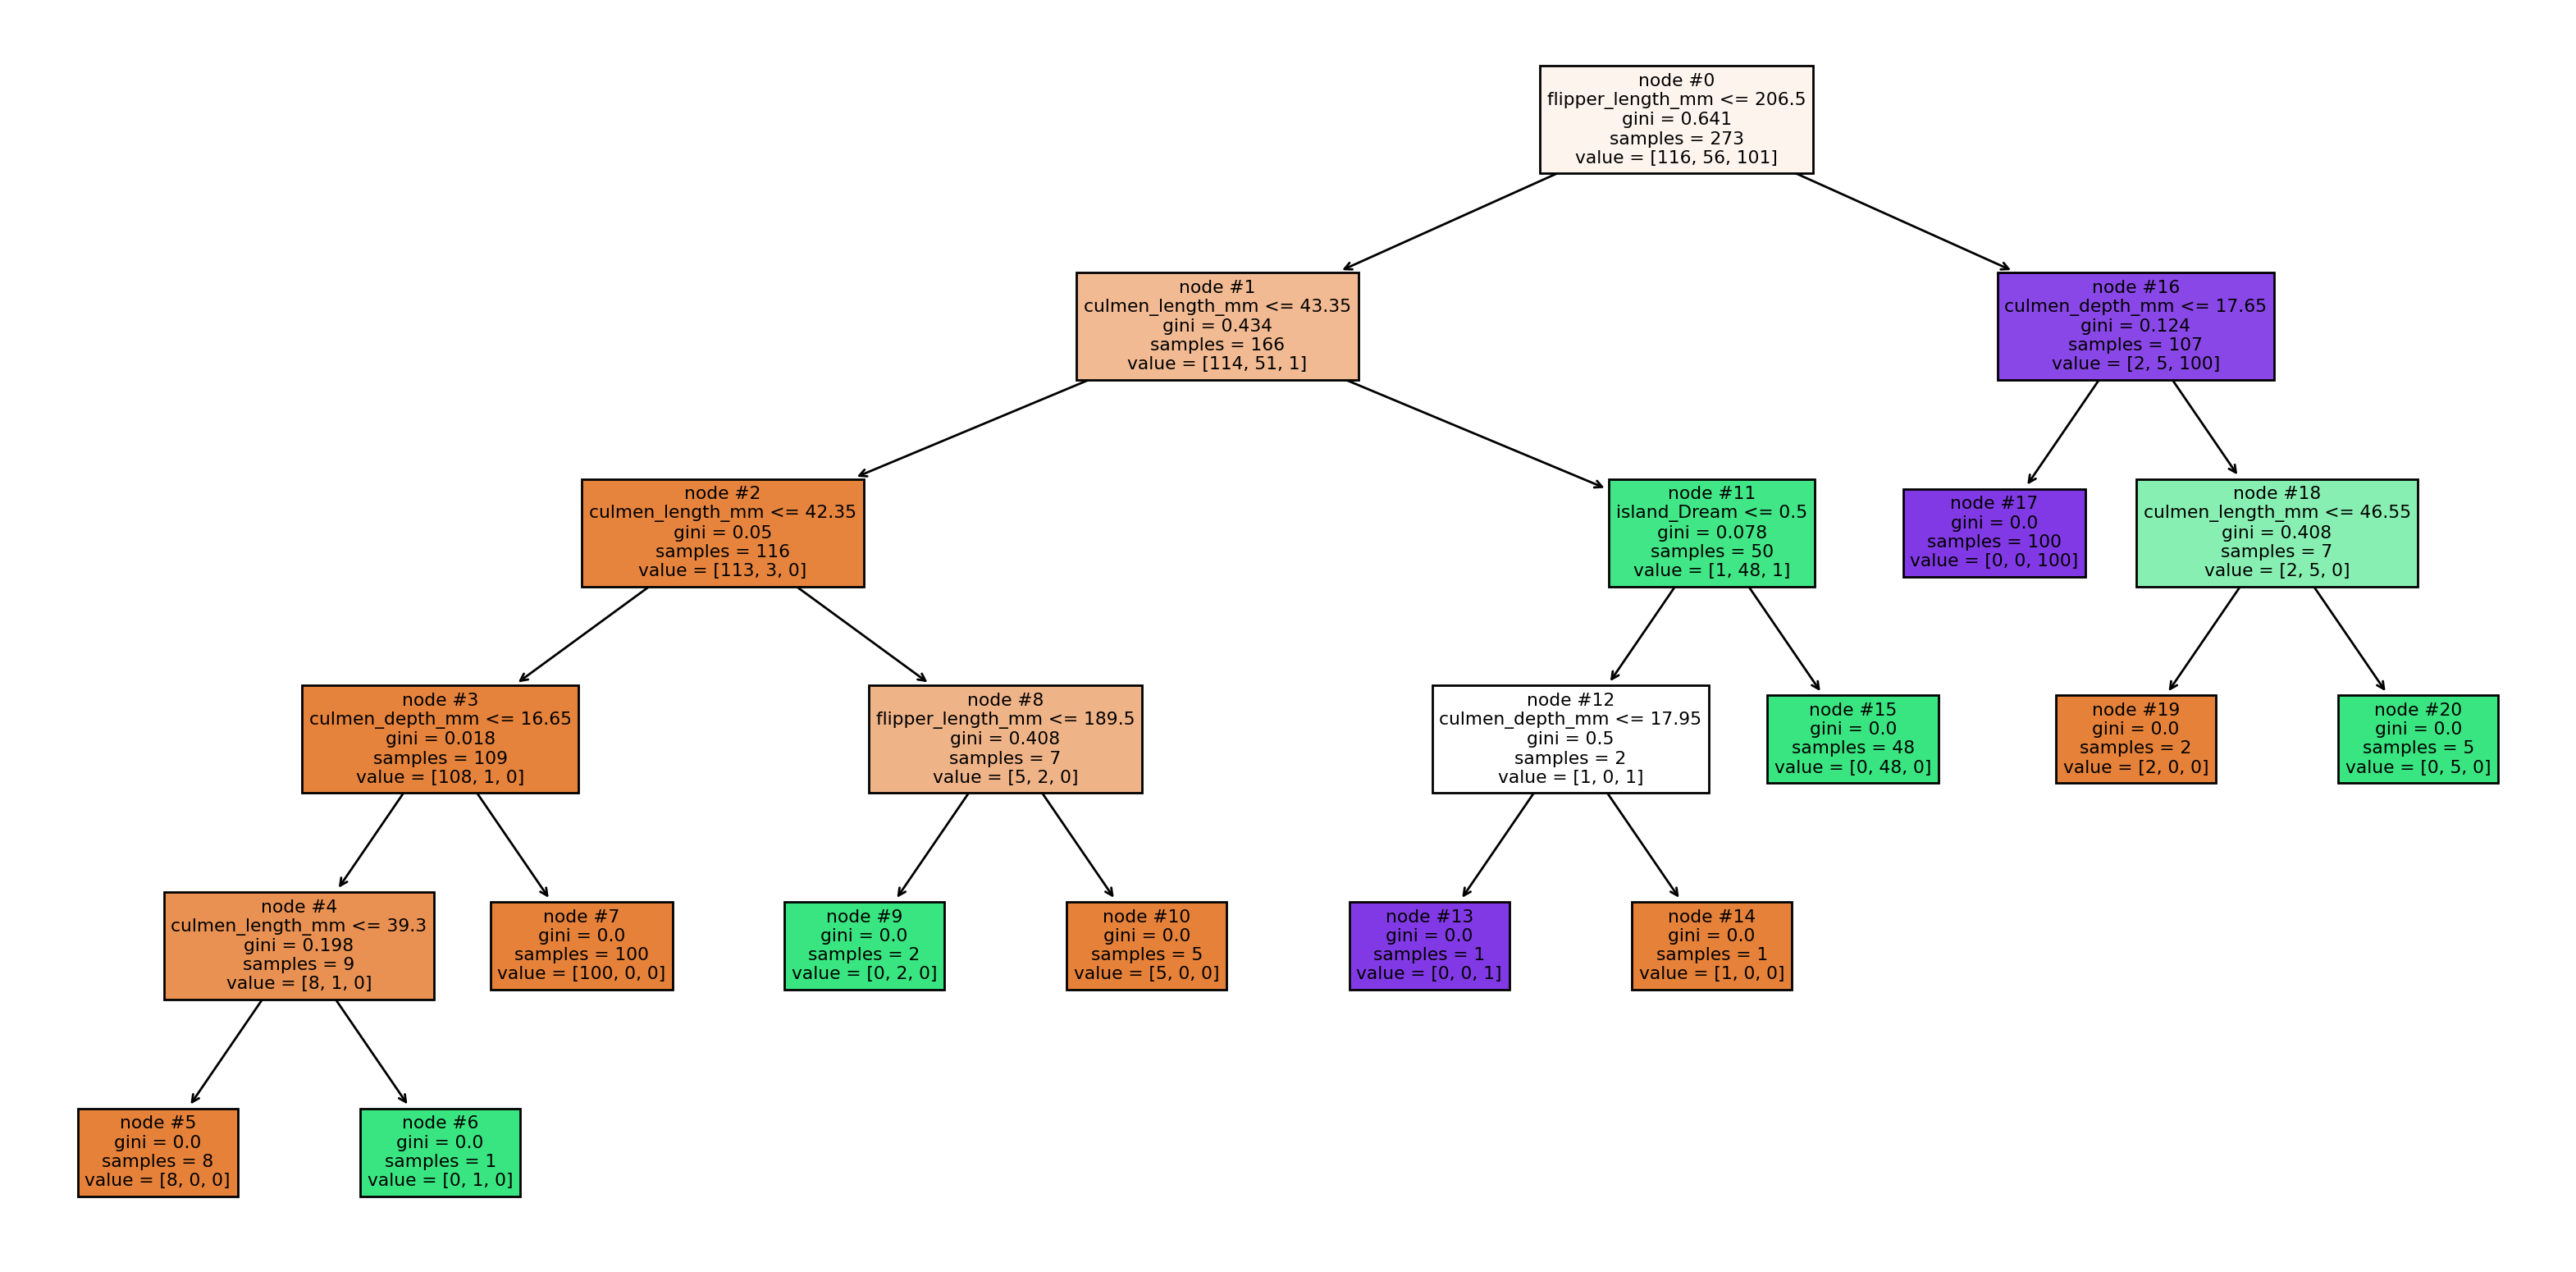

In [102]:
final_model = estimator_dict['Best_estimator'].fit(X, y)
y_hat = final_model.predict(X)

Accuracy: 0.9807692307692307
              precision    recall  f1-score   support

      Adelie       1.00      0.96      0.98        27
   Chinstrap       1.00      1.00      1.00        10
      Gentoo       0.94      1.00      0.97        15

    accuracy                           0.98        52
   macro avg       0.98      0.99      0.98        52
weighted avg       0.98      0.98      0.98        52

                   Features
flipper_length_mm  0.528472
culmen_length_mm   0.388616
culmen_depth_mm    0.066441
island_Dream       0.016471
body_mass_g        0.000000
sex                0.000000
island_Torgersen   0.000000


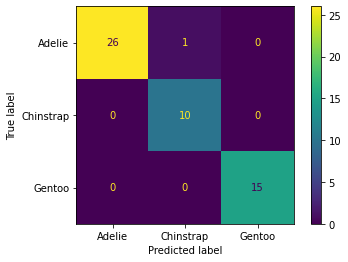

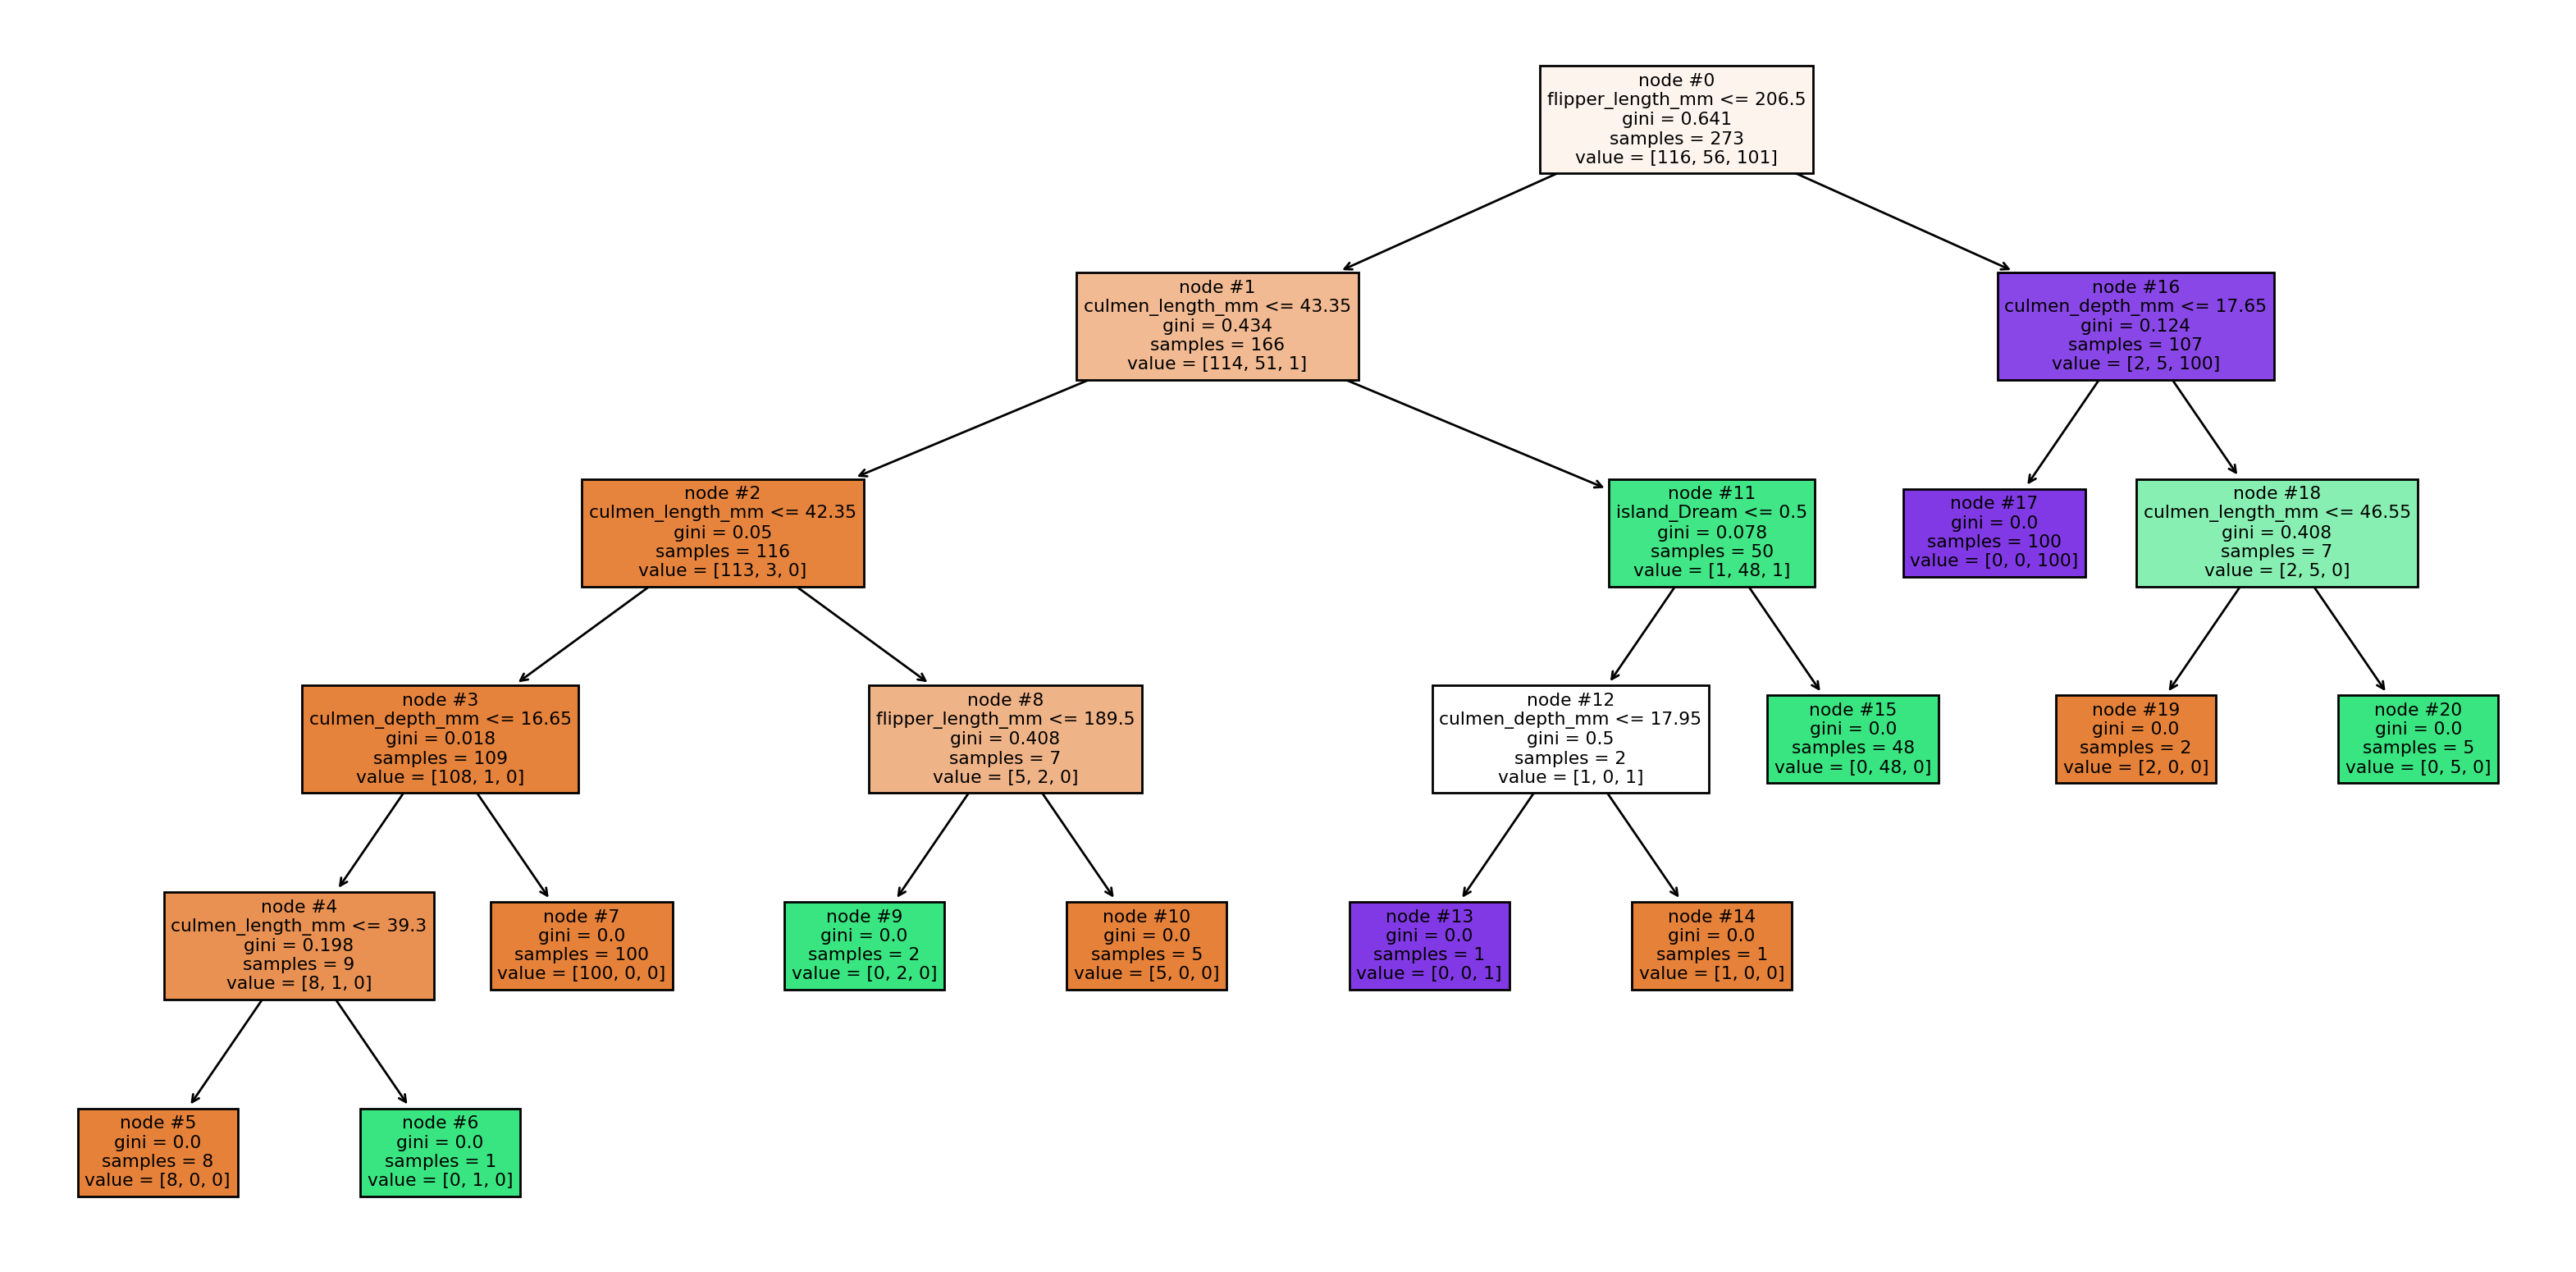

In [103]:
model_report(final_model)